In [1]:
import pandas as pd
import numpy as np

from sklearn.impute import KNNImputer

from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('water_potability.csv')
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [3]:
df.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [4]:
df.isna().mean() * 100 

ph                 14.987790
Hardness            0.000000
Solids              0.000000
Chloramines         0.000000
Sulfate            23.840049
Conductivity        0.000000
Organic_carbon      0.000000
Trihalomethanes     4.945055
Turbidity           0.000000
Potability          0.000000
dtype: float64

In [5]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [6]:
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [7]:
#water_port['ph'].mean()

In [8]:
#water_port['Sulfate'].mean()

In [9]:
knn_imputer = KNNImputer(n_neighbors=5)
array = knn_imputer.fit_transform(df)
df = pd.DataFrame(array, columns=df.columns)
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.156857,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0.0
1,3.716080,129.422921,18630.057858,6.635246,336.094350,592.885359,15.180013,56.329076,4.500656,0.0
2,8.099124,224.236259,19909.541732,9.275884,330.449166,418.606213,16.868637,66.420093,3.055934,0.0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0.0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0.0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1.0
3272,7.808856,193.553212,17329.802160,8.061362,364.091541,392.449580,19.903225,64.327280,2.798243,1.0
3273,9.419510,175.762646,33155.578218,7.350233,327.357588,432.044783,11.039070,69.845400,3.298875,1.0
3274,5.126763,230.603758,11983.869376,6.303357,325.952434,402.883113,11.168946,77.488213,4.708658,1.0


In [10]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,7.078167,196.369496,22014.092526,7.122277,333.605767,426.205111,14.284970,66.403218,3.966786,0.390110
std,1.497228,32.879761,8768.570828,1.583085,37.453055,80.824064,3.308162,15.837754,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.187017,176.850538,15666.690297,6.127421,312.389295,365.734414,12.065801,56.409254,3.439711,0.000000
50%,7.052221,196.967627,20927.833607,7.130299,333.255192,421.884968,14.218338,66.603114,3.955028,0.000000
75%,7.948570,216.667456,27332.762127,8.114887,355.013586,481.792304,16.557652,76.843337,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               3276 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          3276 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3276 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   float64
dtypes: float64(10)
memory usage: 256.1 KB


## Model Training

### Train Test split

In [12]:
x = df.drop('Potability',axis=1)
y = df['Potability']

In [13]:
x_train , x_test, y_train, y_test = train_test_split(x,y,test_size= 0.2,random_state= 15, stratify=y) 

In [14]:
x_train

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
593,6.297846,214.214574,21022.835030,7.258722,331.821977,434.048702,15.872182,64.846905,1.680554
233,6.623614,203.030141,17167.301297,6.049601,311.726288,410.243247,15.914500,65.021229,2.915166
2334,5.508156,192.226546,12137.099597,5.230477,433.021506,405.485510,8.512225,54.915130,4.571406
58,6.451693,157.801194,16963.625012,8.335619,300.044234,360.995994,12.823861,71.717005,4.405386
960,5.276324,186.382590,42063.874405,6.862988,319.837985,312.002533,18.964418,71.398976,3.883029
...,...,...,...,...,...,...,...,...,...
2456,4.921094,162.300594,14126.590530,6.406814,357.815929,337.773051,21.237899,65.704481,3.285187
2621,5.859690,163.496895,19231.033290,6.541681,339.371480,468.376955,19.749079,61.790980,2.747333
2020,7.304024,212.705332,25626.481050,8.590184,338.663535,330.253375,11.052838,64.472001,4.219226
2486,4.473882,120.101908,30013.700749,6.369371,337.682463,433.744392,8.510883,100.232295,4.893657


### Instantiating KNN Classifier

In [15]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(x_train,y_train)

KNeighborsClassifier()

## Model Evaluation

### Training Data evaluation

In [16]:
# training data evaluation

y_pred_train = knn_clf.predict(x_train)

In [17]:
y_pred_train[5:15]

array([0., 0., 1., 1., 1., 0., 0., 1., 1., 0.])

In [18]:
y_train[5:15].to_numpy()

array([1., 0., 0., 1., 1., 0., 0., 1., 0., 0.])

In [19]:
knn_clf.score(x_train,y_train)

0.7198473282442748

In [20]:
cnf_matrix = confusion_matrix(y_train,y_pred_train)
print("cnf matrix:\n",cnf_matrix)

acc = accuracy_score(y_train,y_pred_train)
print("accuracy :\n", acc)

clf_report = classification_report(y_train,y_pred_train)
print("clf report :\n",clf_report)


cnf matrix:
 [[1373  225]
 [ 509  513]]
accuracy :
 0.7198473282442748
clf report :
               precision    recall  f1-score   support

         0.0       0.73      0.86      0.79      1598
         1.0       0.70      0.50      0.58      1022

    accuracy                           0.72      2620
   macro avg       0.71      0.68      0.69      2620
weighted avg       0.72      0.72      0.71      2620



In [21]:
# testing data evaluation

y_pred_test = knn_clf.predict(x_test)

In [22]:
cnf_matrix = confusion_matrix(y_test,y_pred_test)
print("cnf matrix:\n",cnf_matrix)

acc = accuracy_score(y_test,y_pred_test)
print("accuracy :\n", acc)

clf_report = classification_report(y_test,y_pred_test)
print("clf report :\n",clf_report)


cnf matrix:
 [[300 100]
 [182  74]]
accuracy :
 0.5701219512195121
clf report :
               precision    recall  f1-score   support

         0.0       0.62      0.75      0.68       400
         1.0       0.43      0.29      0.34       256

    accuracy                           0.57       656
   macro avg       0.52      0.52      0.51       656
weighted avg       0.55      0.57      0.55       656



## Hyperparameter tuning

In [23]:
knn_model = KNeighborsClassifier() # new KNN clf

In [24]:
hyperpara = {'n_neighbors' : np.arange(3,20),
            'p': [1,2]} #to check parameters

### using Gridsearch_cv

In [25]:
gscv_knn_model = GridSearchCV(knn_model,hyperpara,cv=3)
gscv_knn_model.fit(x_train,y_train)
gscv_knn_model.best_estimator_

KNeighborsClassifier(n_neighbors=18)

In [26]:
new_knn_model = gscv_knn_model.best_estimator_
new_knn_model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=18)

In [27]:
train_acc = new_knn_model.score(x_train,y_train)
print(train_acc)

0.6335877862595419


In [28]:
test_acc = new_knn_model.score(x_test,y_test)
test_acc

0.5975609756097561

### Train on different k values 

### p = 1 

In [29]:
training_acc = []
testing_acc = []

for k in range(3,20):
    knn_clf_model = KNeighborsClassifier(n_neighbors=k,p =1)
    knn_clf_model.fit(x_train,y_train)
    
    train_acc = knn_clf_model.score(x_train,y_train)
    training_acc.append(train_acc)
    
    test_acc = knn_clf_model.score(x_test,y_test)
    testing_acc.append(test_acc)

In [30]:
print(training_acc)
print(testing_acc)

[0.7751908396946565, 0.7095419847328245, 0.7080152671755725, 0.6820610687022901, 0.6908396946564885, 0.6603053435114504, 0.6732824427480916, 0.6526717557251909, 0.6618320610687023, 0.6480916030534352, 0.648473282442748, 0.6400763358778626, 0.6412213740458015, 0.6347328244274809, 0.6335877862595419, 0.6290076335877862, 0.6297709923664122]
[0.5701219512195121, 0.5929878048780488, 0.5594512195121951, 0.5990853658536586, 0.5807926829268293, 0.6067073170731707, 0.5838414634146342, 0.6158536585365854, 0.6082317073170732, 0.614329268292683, 0.6036585365853658, 0.6097560975609756, 0.600609756097561, 0.614329268292683, 0.6097560975609756, 0.5975609756097561, 0.5899390243902439]


Text(0, 0.5, 'Accuracy')

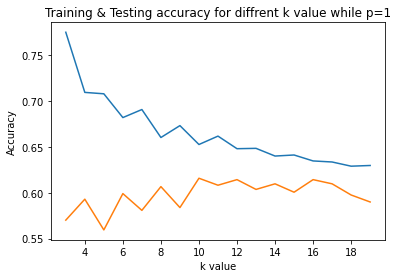

In [31]:
k = np.arange(3,20)
plt.plot(k,training_acc)
plt.plot(k,testing_acc)
plt.title('Training & Testing accuracy for diffrent k value while p=1')
plt.xlabel('k value')
plt.ylabel('Accuracy')

### p = 2

In [32]:
training_acc = []
testing_acc = []

for k in range(3,20):
    knn_clf_model = KNeighborsClassifier(n_neighbors=k,p =2)
    knn_clf_model.fit(x_train,y_train)
    
    train_acc = knn_clf_model.score(x_train,y_train)
    training_acc.append(train_acc)
    
    test_acc = knn_clf_model.score(x_test,y_test)
    testing_acc.append(test_acc)

In [33]:
print(training_acc)
print(testing_acc)

[0.7652671755725191, 0.7068702290076336, 0.7198473282442748, 0.6801526717557251, 0.6900763358778625, 0.6614503816793893, 0.666030534351145, 0.6435114503816793, 0.6538167938931297, 0.6438931297709923, 0.6400763358778626, 0.6423664122137405, 0.648473282442748, 0.6362595419847328, 0.6354961832061069, 0.6335877862595419, 0.6347328244274809]
[0.5396341463414634, 0.6082317073170732, 0.5701219512195121, 0.586890243902439, 0.5914634146341463, 0.5853658536585366, 0.5792682926829268, 0.6036585365853658, 0.5945121951219512, 0.5960365853658537, 0.5884146341463414, 0.6112804878048781, 0.586890243902439, 0.6051829268292683, 0.5899390243902439, 0.5975609756097561, 0.5945121951219512]


Text(0, 0.5, 'Accuracy')

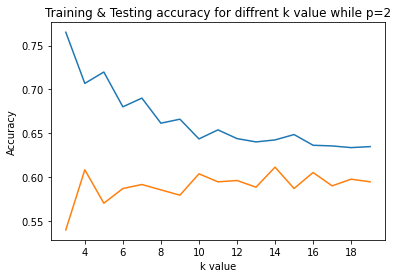

In [34]:
k = np.arange(3,20)
plt.plot(k,training_acc)
plt.plot(k,testing_acc)
plt.title('Training & Testing accuracy for diffrent k value while p=2')
plt.xlabel('k value')
plt.ylabel('Accuracy')